# Assignment 1 (Abdullah Azhar)

INFO 290T 
Assignment - 1

## Part 1.1

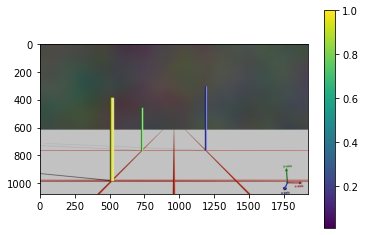

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import sympy as sym

# %matplotlib inline
# %config InlineBackend.figure_format='retina'

## Reading the image and hardcoding x,y coordinates (no. of pixels) of poles in image)
image_path = "Pole Length .png"
image = mpimg.imread(image_path)
imgplot = plt.imshow(image)
plt.colorbar()
plt.savefig("Pole Position Coordinate.png",dpi=500)

y_pixels = (30,575)
g_pixels = (12,296)
b_pixel = (14,445)
lambda_ = 53333
z_diff = 17

Y_world_green,Y_world_yellow = 4,4

def extrinsic_matrix(theta_x,theta_y,theta_z,tx,ty,tz):
    """
    Takes the rotational matrix angles of theta_x, theta_y and theta_z and computes \n
    rotational matrix
    
    Parameters
    ----------
    theta_x : degree of rotation of image in world wrt X camera plane.
    theta_y : degree of rotation of image in world wrt Y camera plane.
    theta_z : degree of rotation of image in world wrt Z camera plane 
    tx: translation of object relative to the x-axis location of camera
    ty: translation of object relative to the y-axis location of camera
    tz: translation of object relative to the z-axis location of camera
    
    Returns
    -------
    Rotational Matrix (Extrinsic Matrix)
    """
    theta_x = np.radians(theta_x)
    theta_y = np.radians(theta_y)
    theta_z = np.radians(theta_z)

    R1 = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x)],[0,np.sin(theta_x),np.cos(theta_x)]])
    R2 = np.array([[np.cos(theta_y),0,np.sin(theta_y)],[0,1,0],[-np.sin(theta_y),0,np.cos(theta_y)]])
    R3 = np.array([[np.cos(theta_z),-np.sin(theta_z),0],[np.sin(theta_z),np.cos(theta_z),0],[0,0,1]])
    RM = R3 @ R2 @ R1
    
    K = np.concatenate((RM,np.array(np.array([[tx],[ty],[tz]]))),axis=1)
    return K

def instrinsic_matrix(f,Cx,Cy):
    """
    Parameters
    ----------
    f : float
        focal length of the lens in mm.
    Cx : float
        Offset between aperture and focal axis in X plane.
    Cy : float
        offset between Y plane and focal axis.

    Returns
    -------
    K : matrix
        The intrinsic matrix of the camera 
    """

    K = np.array([[f,0,Cx],[0,f,Cy],[0,0,1]])
    return K



Because poles are perpendicular to the X-Z Plane and because camera's optical axis 
is parallel to the Z-axis, the rotation of each pole relative to the camera axis 
is at an angle of 0 on each of the 3 planes 

For translations:<br>
Yellow Pole
tx = tx (same for both yellow and green poles as relative position in x plane is same) <br>
ty = 0 (same height for both objects)<br>
tz = tz <br>
    
Green Pole
tx = tx (same for both yellow and green poles as relative position in x plane is same) <br>
ty = 0 (same height for both objects) <br>
tz = tz + 17 (Green pole is 17 units farther from yellow pole in the z axis ) <br>



Solving for y equations of both poles <br>
Green Pole: <br>
    y = lambda*f*(4+ty)/(Z+tz) <br>
Yellow Pole: <br>
    y = lambda*f*(4+ty)/(Z+tz+17)

In [2]:
### Part 1.1 


f_m = z_diff/((1/g_pixels[1]-1/y_pixels[1])*Y_world_green*lambda_)
f_mm = f_m*1000

print(f"THE FOCAL LENGTH OF THE CAMERA IS: {f_mm} millimeters \n")


THE FOCAL LENGTH OF THE CAMERA IS: 48.61253501113952 millimeters 




Simultaneous equations for the green and blue poles (Assumption: Same z coordinates and translation) <br>
Unknown = Yblue <br>
Ty = same for both green and blue pole so can be assumed as 0

In [146]:
### Part 1.2


Zhat = f_m*(Y_world_green)/g_pixels[1]
Y_world_blue = (b_pixel[1]*Zhat)/f_m

print(f"THE ACTUAL LENGTH OF BLUE POLE IN METERS IS {Y_world_blue} meters")

THE ACTUAL LENGTH OF BLUE POLE IN METERS IS 6.013513513513514 meters
